# Capstone Project - Customer Churn Prediction - Modelling

Project Pipeline:

4) Featuring Engineering >>>>>>>
5) Train Test Split >>>>>>>>
6) Define & Fit Model >>>>>>>
7) Model Evaluation >>>>>>>
8) Model Optimization >>>>>>
9) Model Deployment !!!

In [1]:
# Import package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import plotly.express as px
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
 
    
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier


from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint


# Avoid some version change warning
import warnings
warnings.filterwarnings("ignore")


### Load Data

In [2]:
# Import data

df = pd.read_csv('../2. Data/Telco-Customer-Churn.csv')

### Data Cleaning

In [3]:
# Drop the rows with missing values.

df = df.dropna()

In [4]:
# Consolidating wording with same meaning

df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [5]:
# Change data type from object to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [6]:
# Re inspect the data type

df['TotalCharges'].dtypes

dtype('float64')

In [7]:
# Rename "PaymentMethod" column to presentable format

Payment_Method = {'Electronic check': 'E-Check' , 
                  'Mailed check': 'Mailed Check', 
                  'Bank transfer (automatic)': 'Bank Transfer', 
                  'Credit card (automatic)': 'Credit Card'}

df["PaymentMethod"].replace(Payment_Method, inplace=True)

## 4) Featuring Engineering

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed Check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit Card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed Check,74.40,306.60,Yes


In [9]:
# Data subset: Remove customer ID from data frame

df = df.drop(columns=['customerID'])

In [10]:
# Check columns with two classes

columns = df.columns
binary_columns = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_columns.append(col)
        
 
print('Number of columns with 2 class =',len(binary_columns))
binary_columns

Number of columns with 2 class = 14


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [11]:
# Check columns with multiple classes

columns = df.columns
multiple_class_columns = []

for col in columns:
    if df[col].value_counts().shape[0] != 2:
        multiple_class_columns.append(col)
        
 
print('Number of columns with multiple classes =',len(multiple_class_columns))
multiple_class_columns

Number of columns with multiple classes = 6


['tenure',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

### Label Encoding

In [12]:
# Convert Yes & No to 1 & 0

for column in binary_columns:
    df[column].replace({'Yes':1, 'No':0}, inplace=True)

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,E-Check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed Check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed Check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank Transfer,42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,E-Check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed Check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit Card,103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,E-Check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed Check,74.40,306.60,1


In [14]:
# Label Male & Female to 1 & 0

df.gender.replace({'Male':1, 'Female':0}, inplace=True)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,E-Check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed Check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed Check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank Transfer,42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,E-Check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed Check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit Card,103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,E-Check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed Check,74.40,306.60,1


In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df.shape

(7043, 20)

In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,E-Check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed Check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed Check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank Transfer,42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,E-Check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed Check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit Card,103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,E-Check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed Check,74.40,306.60,1


### One Hot Encoding

In [19]:
# Creating dummy columns for features with multiple classes and non continuos datapoint

df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank Transfer',
       'PaymentMethod_Credit Card', 'PaymentMethod_E-Check',
       'PaymentMethod_Mailed Check'],
      dtype='object')

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_E-Check,PaymentMethod_Mailed Check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [22]:
# Rename column to presentable format

df = df.rename({'gender': 'Gender',
                'tenure': 'Tenure',
                'InternetService_DSL': 'IntService_DSL', 
                'InternetService_Fiber optic': 'IntService_Fiber', 
                'InternetService_No': 'IntService_No',
                'Contract_Month-to-month': 'Contract_Mth', 
                'Contract_One year': 'Contract_1Y', 
                'Contract_Two year': 'Contract_2Y',
                'PaymentMethod_Bank Transfer': 'PayMethod_Bank', 
                'PaymentMethod_Credit Card': 'PayMethod_C_Card', 
                'PaymentMethod_E-Check': 'PayMethod_Electonic', 
                'PaymentMethod_Mailed Check': 'PayMethod_Mail'}, axis=1)

In [23]:
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,IntService_DSL,IntService_Fiber,IntService_No,Contract_Mth,Contract_1Y,Contract_2Y,PayMethod_Bank,PayMethod_C_Card,PayMethod_Electonic,PayMethod_Mail
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [24]:
# Relocate "Churn" column to last row

df= df[ [ col for col in df.columns if col != 'Churn' ] + ['Churn']]

In [25]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'IntService_DSL',
       'IntService_Fiber', 'IntService_No', 'Contract_Mth', 'Contract_1Y',
       'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail', 'Churn'],
      dtype='object')

In [26]:
# Re-inspect datapoint

df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,IntService_Fiber,IntService_No,Contract_Mth,Contract_1Y,Contract_2Y,PayMethod_Bank,PayMethod_C_Card,PayMethod_Electonic,PayMethod_Mail,Churn
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,1
3,1,0,0,0,45,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1


In [27]:
# Check new data frame size

df.shape

(7043, 27)

In [28]:
# Check new data columns

df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'IntService_DSL',
       'IntService_Fiber', 'IntService_No', 'Contract_Mth', 'Contract_1Y',
       'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail', 'Churn'],
      dtype='object')

In [29]:
columns = df.columns

for col in columns:
   df[columns] = df[columns].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               7043 non-null   float64
 1   SeniorCitizen        7043 non-null   float64
 2   Partner              7043 non-null   float64
 3   Dependents           7043 non-null   float64
 4   Tenure               7043 non-null   float64
 5   PhoneService         7043 non-null   float64
 6   MultipleLines        7043 non-null   float64
 7   OnlineSecurity       7043 non-null   float64
 8   OnlineBackup         7043 non-null   float64
 9   DeviceProtection     7043 non-null   float64
 10  TechSupport          7043 non-null   float64
 11  StreamingTV          7043 non-null   float64
 12  StreamingMovies      7043 non-null   float64
 13  PaperlessBilling     7043 non-null   float64
 14  MonthlyCharges       7043 non-null   float64
 15  TotalCharges         7032 non-null   f

### Data Imputation

In [31]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute

values = df.values

# define the criteria for dealing with the missing values

imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)
# Now impute it

imputedData = imputer.fit_transform(values)

In [32]:
# Check data 

imputedData[:3] 

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.9850e+01,
        2.9850e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4000e+01,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.6950e+01,
        1.8895e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.3850e+01,
        1.0815e+02, 1.0000e+00, 0.0000e+00, 0.0000

### Feature Scaling & Normalization

In [33]:
# Scale data betwen 0 & 1 and normalisaiton

scaler = MinMaxScaler(feature_range = (0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [34]:
# Check data

normalizedData[:3]

array([[0.        , 0.        , 1.        , 0.        , 0.01388889,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.11542289,
        0.0012751 , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.47222222,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.38507463,
        0.21586661, 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.02777778,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.35422886,
        0.01031041, 1.        , 0.        , 0.    

In [35]:
# Move the data back to a dataframe

df_n = pd.DataFrame.from_records(normalizedData, columns = df.columns)
df_n['Churn'] = df_n['Churn'].astype(np.int8)
df_n.sample(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,IntService_Fiber,IntService_No,Contract_Mth,Contract_1Y,Contract_2Y,PayMethod_Bank,PayMethod_C_Card,PayMethod_Electonic,PayMethod_Mail,Churn
183,1.0,0.0,1.0,1.0,0.458333,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2451,1.0,0.0,1.0,1.0,0.388889,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
5355,1.0,0.0,0.0,0.0,0.666667,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4538,0.0,0.0,0.0,0.0,0.041667,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4106,0.0,1.0,1.0,0.0,0.333333,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [36]:
df_n.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'IntService_DSL',
       'IntService_Fiber', 'IntService_No', 'Contract_Mth', 'Contract_1Y',
       'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail', 'Churn'],
      dtype='object')

In [37]:
# create X and y to match Scikit-Learn parlance

# X include all the features
X = df_n.drop(columns=['Churn'])

# y is the target variable
y = df_n['Churn']

In [38]:
X.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,IntService_DSL,IntService_Fiber,IntService_No,Contract_Mth,Contract_1Y,Contract_2Y,PayMethod_Bank,PayMethod_C_Card,PayMethod_Electonic,PayMethod_Mail
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
X.shape

(7043, 26)

In [40]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

In [41]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## 5) Train Test Split

In [42]:
## Create training and testing subsets

test_size = 0.3

# X = df.iloc[:,:-1] #omit the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 55, stratify = y)

# # Apply imputer and scalar pipeline to each of X_train and X_test separately
# pipeline = Pipeline([('imputer', imputer), ('scaler', MinMaxScaler())])

# # Pipeline is fit to X_train, then applied to both X_train and X_test
# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.transform(X_test) 

In [43]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (4930, 26)
X_test shape : (2113, 26)
y_train shape : (4930,)
y_test shape : (2113,)


## 6) Define & Fit Models

### Logistic Regression

In [44]:
# Instanciate and train the logistic regression model based on the training set.

logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_logr = logr.predict(X_test)
y_pred_logr_prob = logr.predict_proba(X_test)

### Support Vector Machine

In [46]:
# Instanciate and train the SVM model on the training set.

svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)

SVC(probability=True)

In [47]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_svm = svm.predict(X_test)
y_pred_svm_prob = svm.predict_proba(X_test)

### K Nearest Neighbors

In [48]:
# Instanciate and train the KNN classifier based on the training set.

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
# Make predictions (classes and probabilities) with the trained classifier on the test set.

y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

### Random Forest

In [50]:
# Instanciate and train the random forest model based on the training set.

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

### Neural Network

In [52]:
# Instanciate NN, build up layer structure and compile model  *** May not suitable for churn prediction.

nn = Sequential()
Input_Shape = X_train.shape[1]

nn.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu'))
nn.add(Dropout(0.2)) 
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2)) 
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

# Set callback to store model with best validation accuracy during training.
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# Train model and store best performing version
fit_nn = nn.fit(X_train, y_train,
          epochs=100,
          verbose=False,
          validation_data=(X_test, y_test),
          batch_size=30, callbacks=[mc])

best_nn = load_model('best_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              27648     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,078,273
Trainable params: 1,078,273
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_nn = best_nn.predict(X_test)
# y_pred_nn_prob = best_nn.predict_proba(X_test)
y_pred_nn_classes = (best_nn.predict(X_test) > 0.5).astype("int32")


# Reduce to 1d array.
y_pred_nn_prob_1 = y_pred_nn[:,0]
y_pred_nn_classes_1 = y_pred_nn_classes[:,0]

## 7) Model Evaluation 

### Model Evaluation Metrics

In [54]:
# Define a function that plots the feature weights for a classifier.

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [55]:
# Define a function with Accuracy. Precision, Recall, ROC-AUC, Confusion Matrix

def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)
    f1_ = f1_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('F1 Score : %.4f [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0' % f1_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, f1_, precision_, recall_, roc_auc_)

### Model Evaluation

#### Logistic Regression

Accuracy : 0.7996 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5835 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6504 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5291 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7132                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


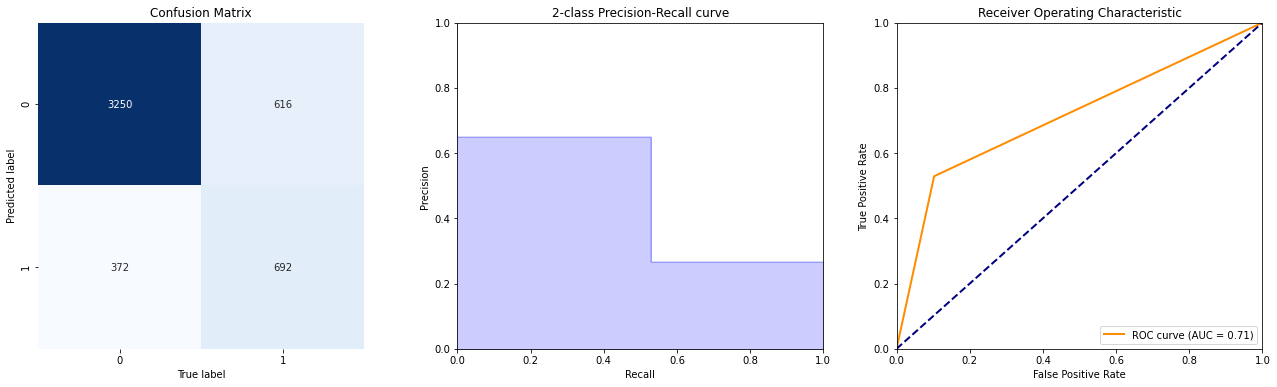

In [56]:
model = logr

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_train)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

Accuracy : 0.8116 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.6090 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6783 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5526 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7289                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


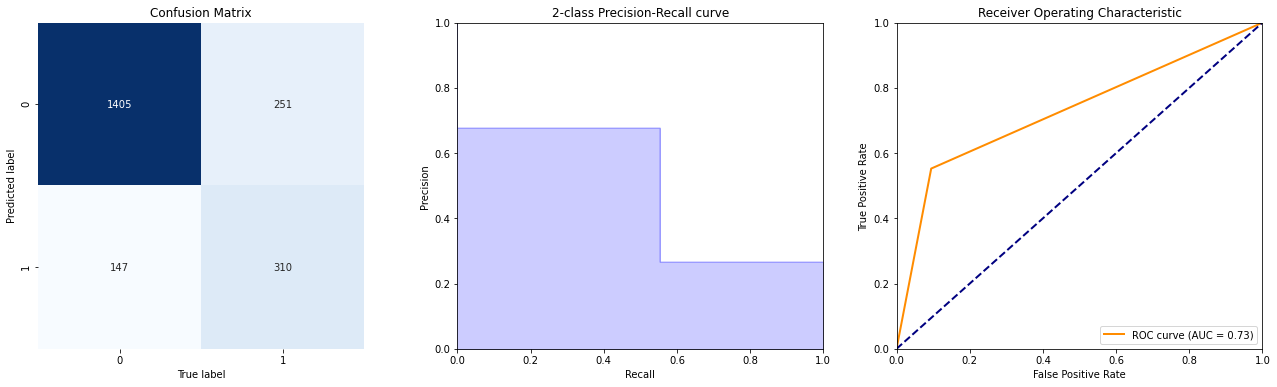

In [57]:
model = logr

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

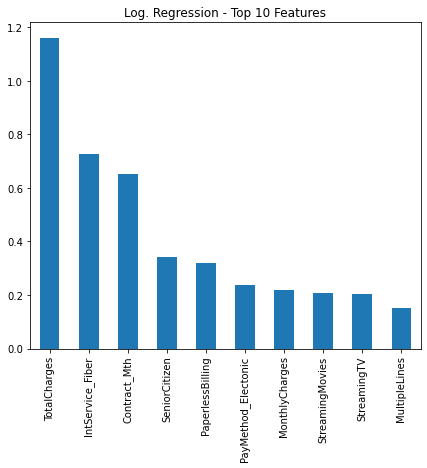

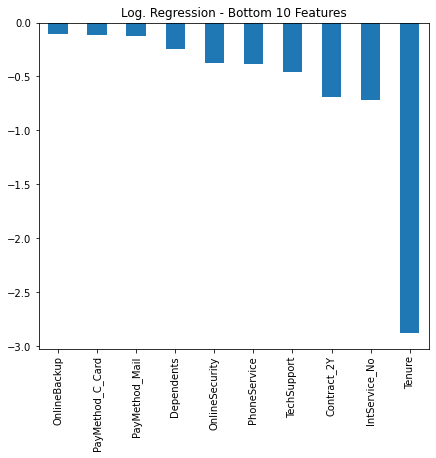

In [58]:
# Plot model evaluations.

feature_weights(X, logr, 'Log. Regression')

#### SVM

Accuracy : 0.8130 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5949 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6994 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5176 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7186                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


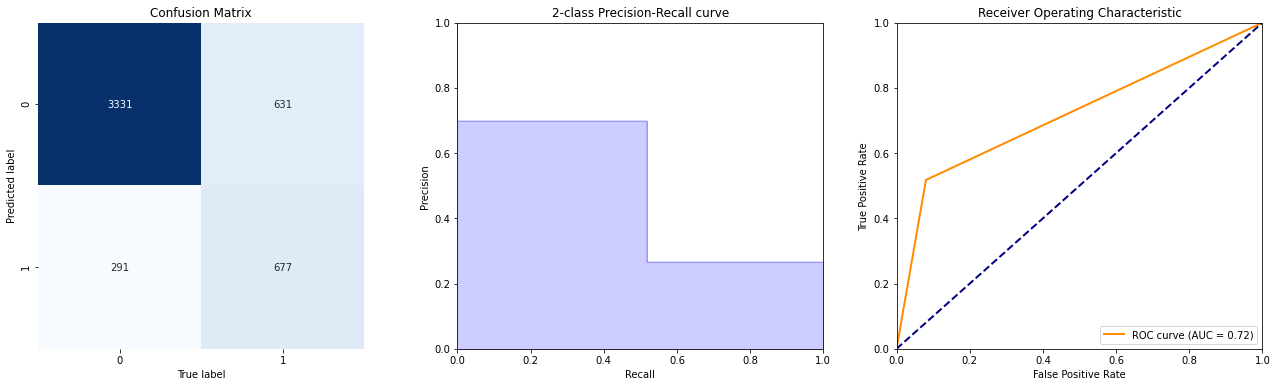

In [59]:
model = svm

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_train)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

Accuracy : 0.8003 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5720 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6635 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5027 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7053                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


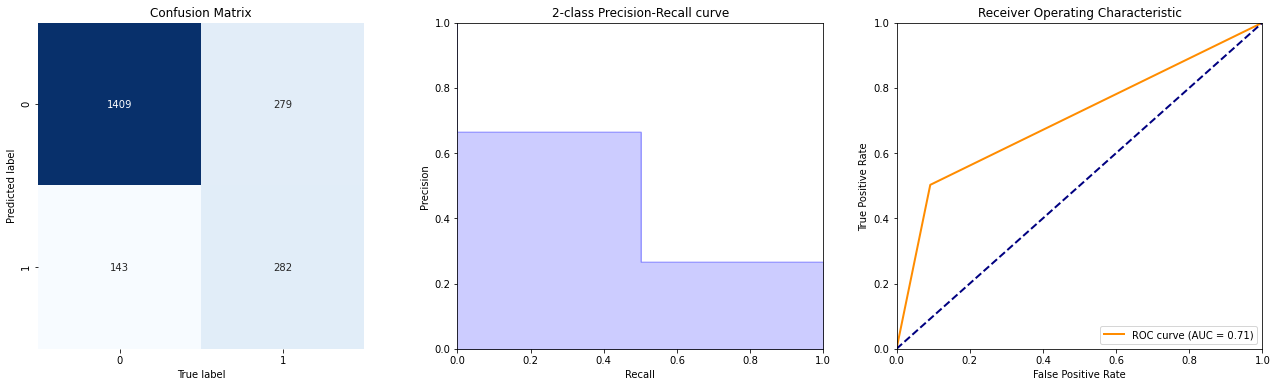

In [60]:
model = svm

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### K Nearest Neighbors

Accuracy : 0.8270 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.6589 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6907 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6300 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7640                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


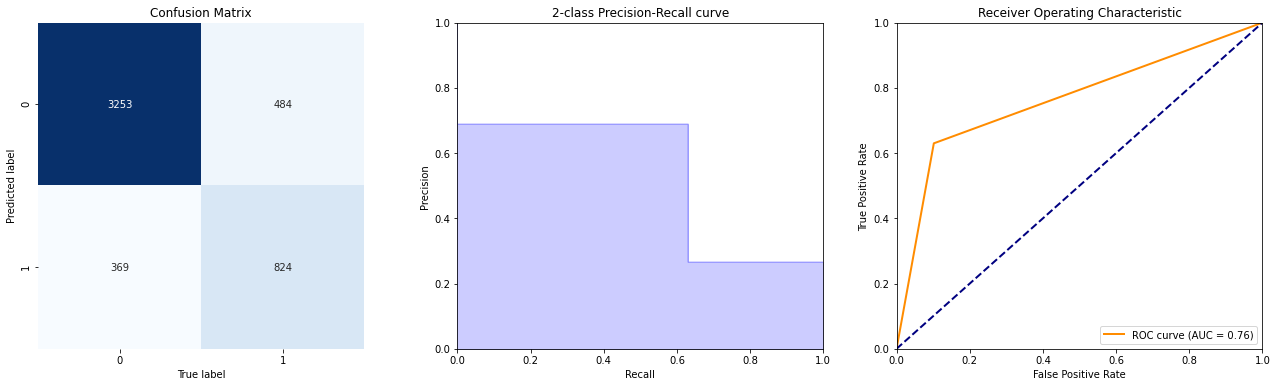

In [61]:
model = knn

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_train)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

Accuracy : 0.7653 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5312 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.5654 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5009 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6809                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


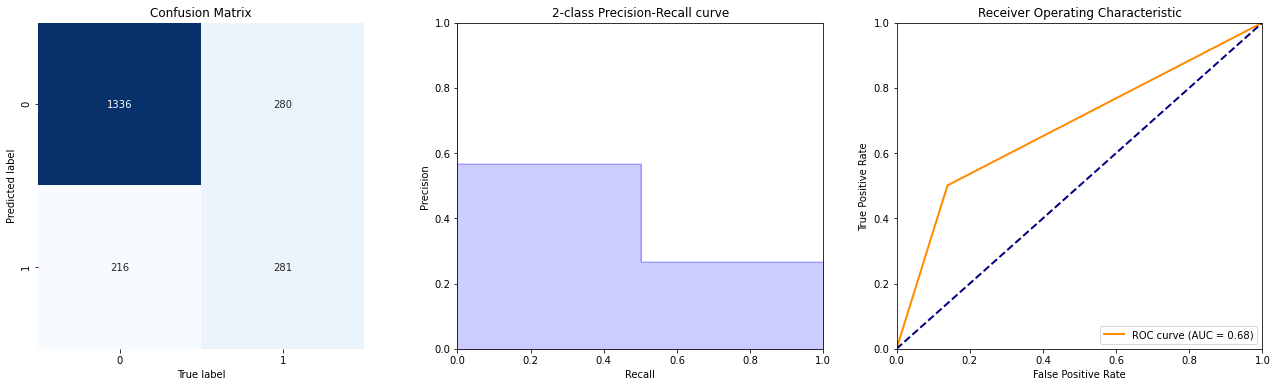

In [62]:
model = knn

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### Random Forest

Accuracy : 0.9976 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.9954 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.9977 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9931 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9961                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


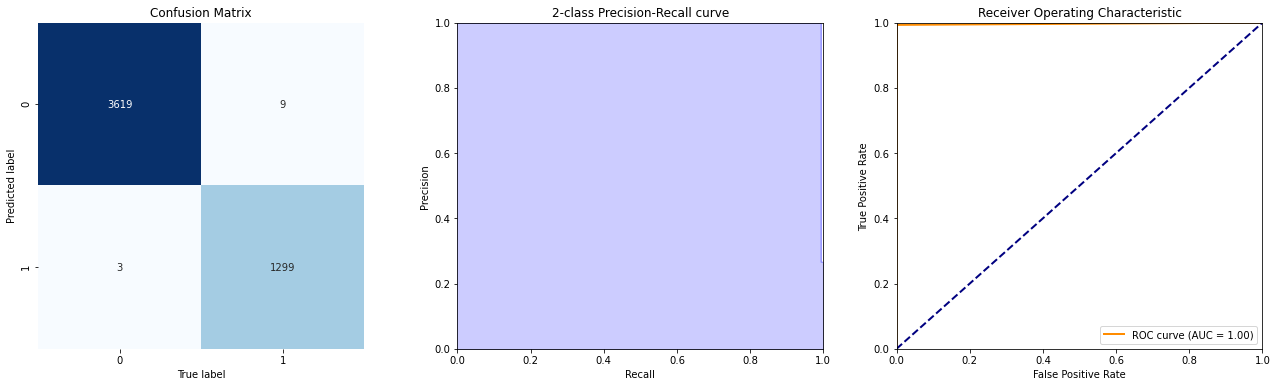

In [63]:
model = rf

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_train)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

Accuracy : 0.7913 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5568 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6382 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4938 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6963                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


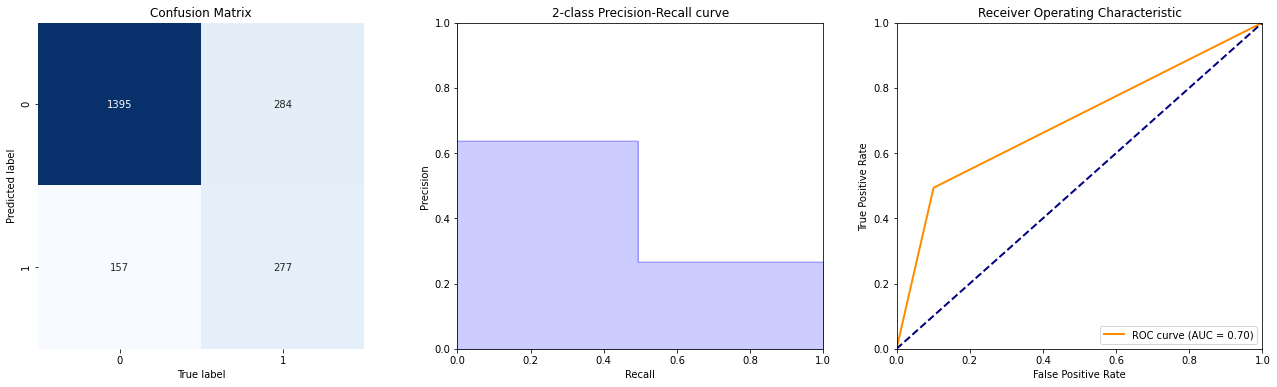

In [64]:
model = rf

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### Neural Network

In [65]:
# Print NN evaluation metrics.

nn_conf_matrix = confusion_matrix(y_test, y_pred_nn_classes_1)
print(f'Confusion Matrix:\n{nn_conf_matrix}')
print("-----------------------------------------")

nn_accuracy = accuracy_score(y_test, y_pred_nn_classes_1)
print('Accuracy: %f' % nn_accuracy)

nn_auc = roc_auc_score(y_test, y_pred_nn_prob_1)
print('ROC AUC: %f' % nn_auc)
print("-----------------------------------------")

nn_precision = precision_score(y_test, y_pred_nn_classes_1)
print('Precision: %f' % nn_precision)

nn_recall = recall_score(y_test, y_pred_nn_classes_1)
print('Recall: %f' % nn_recall)

nn_f1 = f1_score(y_test, y_pred_nn_classes_1)
print('F1 score: %f' % nn_f1)

Confusion Matrix:
[[1375  177]
 [ 223  338]]
-----------------------------------------
Accuracy: 0.810696
ROC AUC: 0.854696
-----------------------------------------
Precision: 0.656311
Recall: 0.602496
F1 score: 0.628253


## 8) Model Optimization

###  Grid Search CV Hyperparameter tunning

#### Logistic Regression

In [66]:
# Define parameter grid for GridSearch and instanciate and train model.

param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logr_tuned = LogisticRegression(solver='saga', max_iter=1000)   
logr_tuned_gs = GridSearchCV(logr_tuned, param_grid_L1, cv=5)
logr_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_logr_tuned = logr_tuned_gs.predict(X_test)
y_pred_logr_tuned_prob = logr_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logr_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.1, 'penalty': 'l1'}


Accuracy : 0.8083 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5921 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6806 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5241 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7176                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


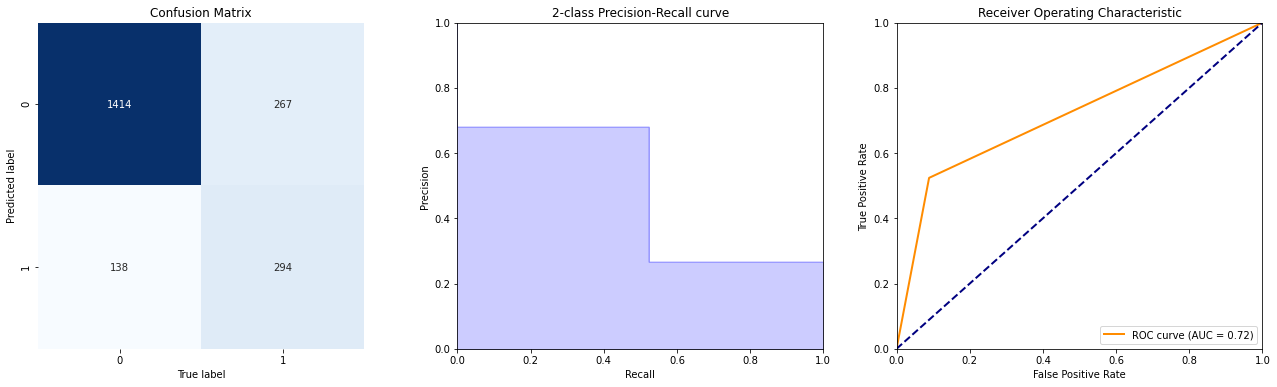

In [67]:
model = logr_tuned_gs

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### SVM

In [68]:
# Define parameter grid for GridSearch and instanciate and train model.

param_grid_svm = {'C': np.arange(.1, 3, .1)}
svm = SVC(kernel='linear', probability=True) 
svm_tuned_gs = GridSearchCV(svm, param_grid_svm, cv=5)
svm_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_svm_tuned = svm_tuned_gs.predict(X_test)
y_pred_svm_tuned_prob = svm_tuned_gs.predict_proba(X_test)

print('SVM best C value', svm_tuned_gs.best_params_, '\n')

SVM best C value {'C': 0.1} 



Accuracy : 0.8003 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5927 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6463 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5472 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7195                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


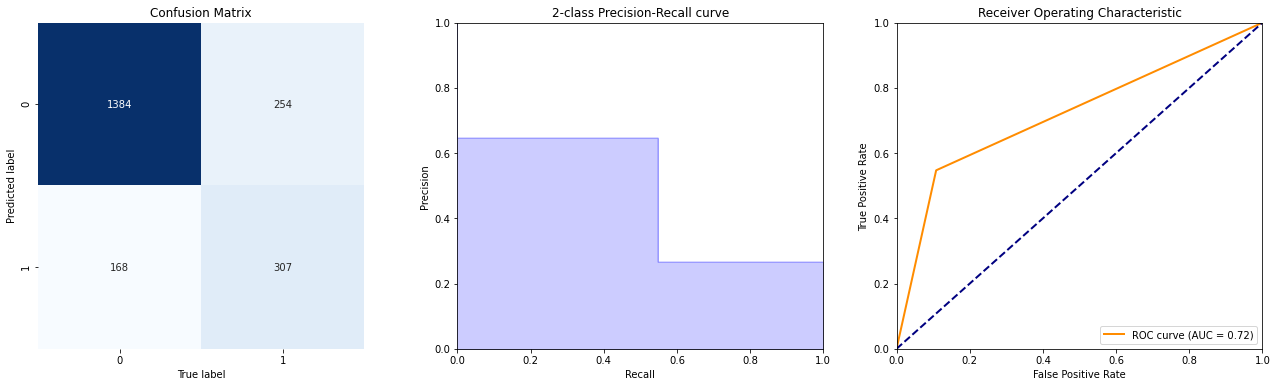

In [69]:
model = svm_tuned_gs

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### KNN

In [70]:
# Define parameter grid for GridSearch and instanciate and train model.

param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, param_grid, cv=5)
knn_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_knn_tuned = knn_gs.predict(X_test)
y_pred_knn_tuned_prob = knn_gs.predict_proba(X_test)

print('KNN best number of neighbors:', knn_gs.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 26} 



Accuracy : 0.7932 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5834 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6270 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5455 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7141                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


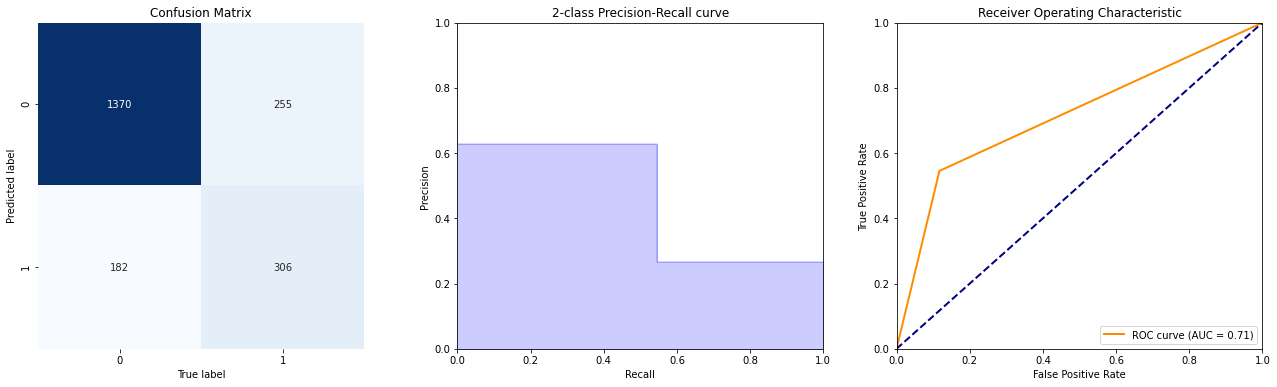

In [71]:
model = knn_gs

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

#### Random Forest

In [72]:
# Define parameter grid for RandomizedSearch and instanciate and train model.

param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_rg = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_rg.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.

y_pred_rf_tuned = rf_rg.predict(X_test)
y_pred_rf_tuned_prob = rf_rg.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_rg.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 570, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}


Accuracy : 0.8154 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.6053 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.7002 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5330 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7253                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


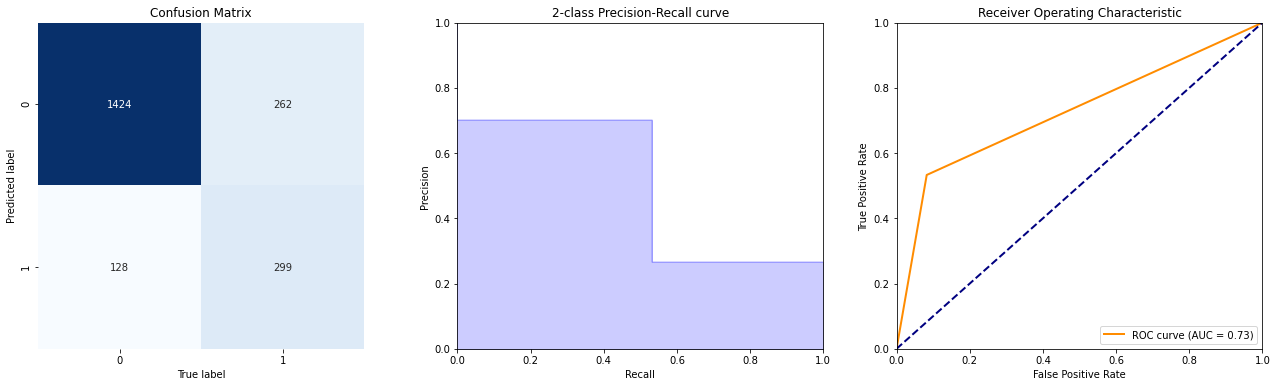

In [73]:
model = rf_rg

# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

predictions = model.predict(X_test)

# show the report
accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
#     # keep the results
results = {'Model': model, 
           'F1': f1_,
           'Accuracy': accuracy_, 
           'Precision': precision_,
           'Recall': recall_,
           'ROC_AUC': roc_auc_}
print()

### Emsemble Method

In [74]:
# Instanciate and train the Dcision Tree model on the training set.

kfold = KFold(n_splits = 10, random_state = 7)
dtc = DecisionTreeClassifier(splitter = 'random', max_depth = 1) 
# cart = DecisionTreeClassifier(max_depth = 1) 
dtc.fit(X_train, y_train)
results = cross_val_score(dtc, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.7347


In [75]:
# Instanciate and train the Boosting model on the training set.

seed = 7
num_trees = 35
kfold = KFold(n_splits = 10, random_state = seed)
# model = AdaBoostClassifier(base_estimator = cart, n_estimators = num_trees, learning_rate = 0.7, random_state = seed)
Ada = AdaBoostClassifier(base_estimator = dtc, n_estimators = num_trees, learning_rate = 0.8)
# if estimator not specified, therefore default is DecisionTreeClassifier initialized with max_depth=1
Ada.fit(X_train, y_train)
results = cross_val_score(Ada, X_train, y_train, cv = kfold)
print('AdaBoost, Cross-Validation mean: %.4f' % results.mean())


AdaBoost, Cross-Validation mean: 0.7976


*****************
* Decision Tree *
*****************
Accuracy : 0.7347 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.0000 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


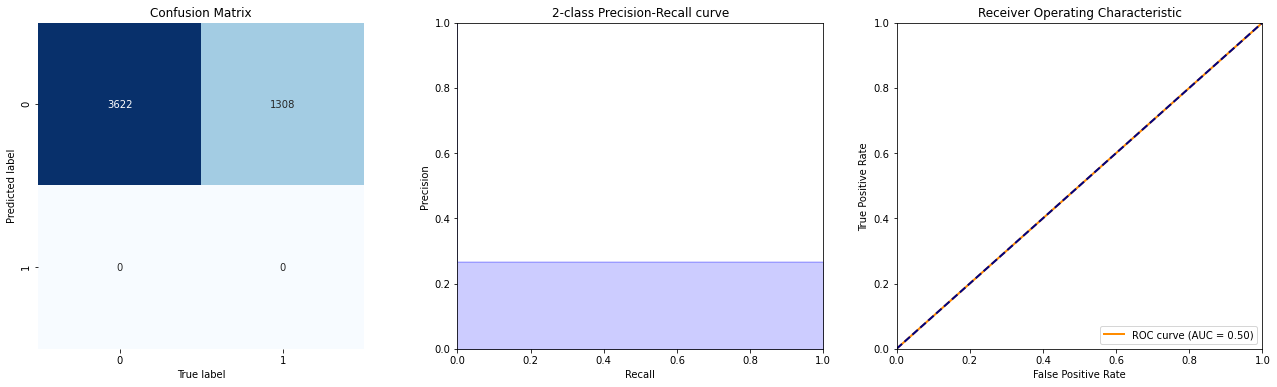


************
* AdaBoost *
************
Accuracy : 0.8018 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5844 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6587 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5252 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7135                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


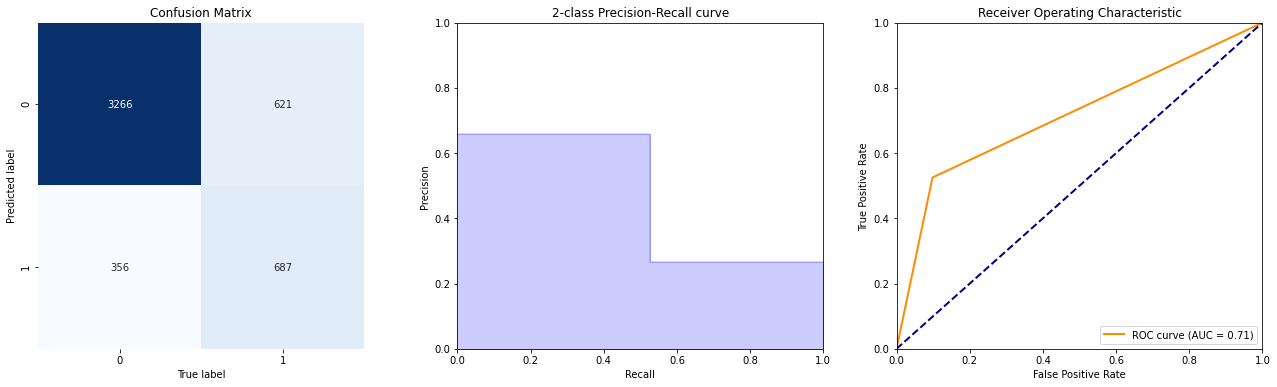

In [76]:
# Evaluate the models

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'AdaBoost']
for i, m in enumerate([dtc, Ada]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    # show the report
    accuracy_, f1_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'F1': f1_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [77]:
# Keep the results in a dataframe

results

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,Decision Tree,0.734686,0.000000,0.000000,0.000000,0.500000
1,AdaBoost,0.801826,0.584432,0.658677,0.525229,0.713471


In [78]:
# Fit into Testing Data

predictions = Ada.predict(X_test)

*****************
* Decision Tree *
*****************
Accuracy : 0.7345 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.0000 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


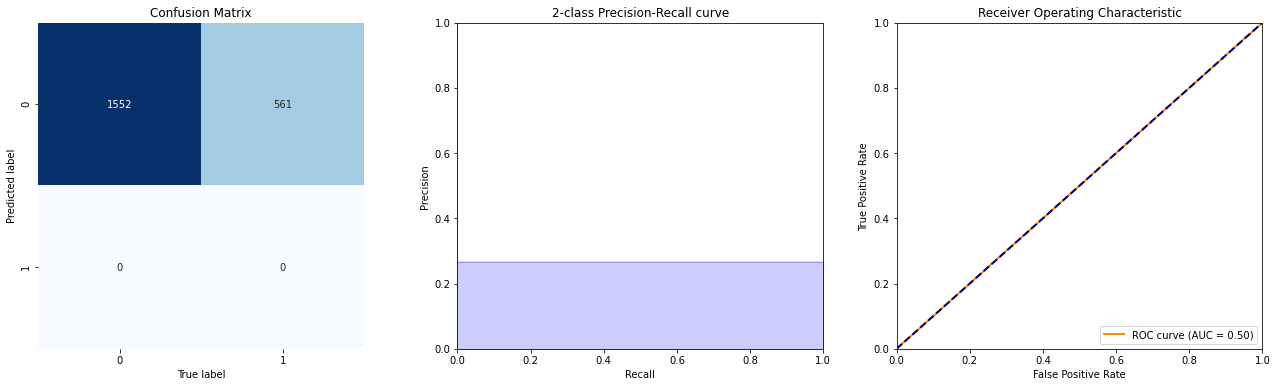


************
* AdaBoost *
************
Accuracy : 0.8135 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5980 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6993 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5223 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7205                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


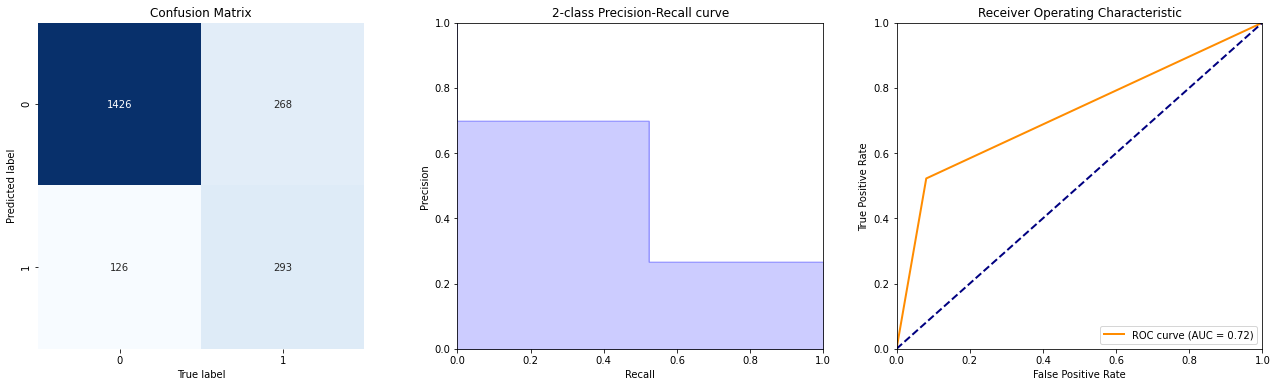

In [79]:
# Evaluate the models

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'AdaBoost']
for i, m in enumerate([dtc, Ada]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_test)
    # show the report
    accuracy_, f1_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'F1': f1_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [80]:
# Keep the results in a dataframe

results

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,Decision Tree,0.734501,0.000000,0.000000,0.000000,0.500000
1,AdaBoost,0.813535,0.597959,0.699284,0.522282,0.720548


#### Summary all models

***********************
* Logistic Regression *
***********************
Accuracy : 0.8083 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5921 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6806 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5241 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7176                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


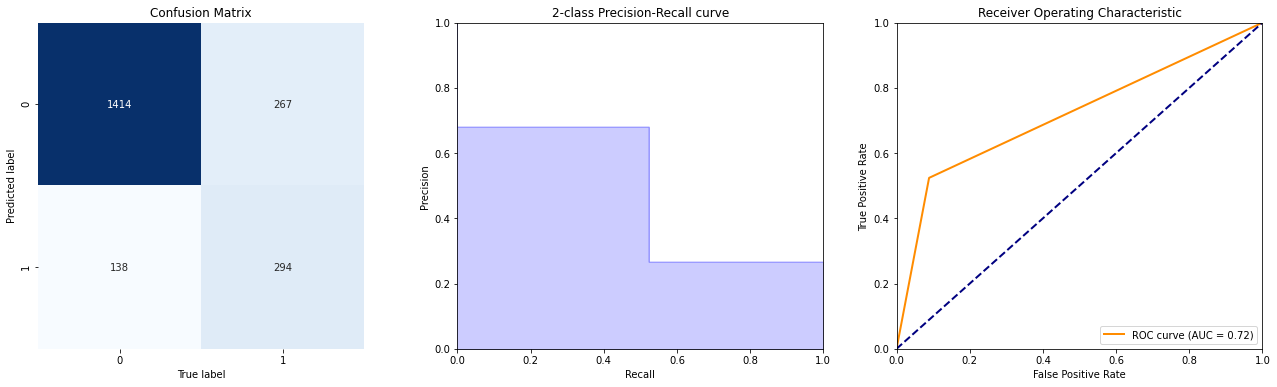


**************************
* Support Vector Machine *
**************************
Accuracy : 0.8003 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5927 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6463 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5472 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7195                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


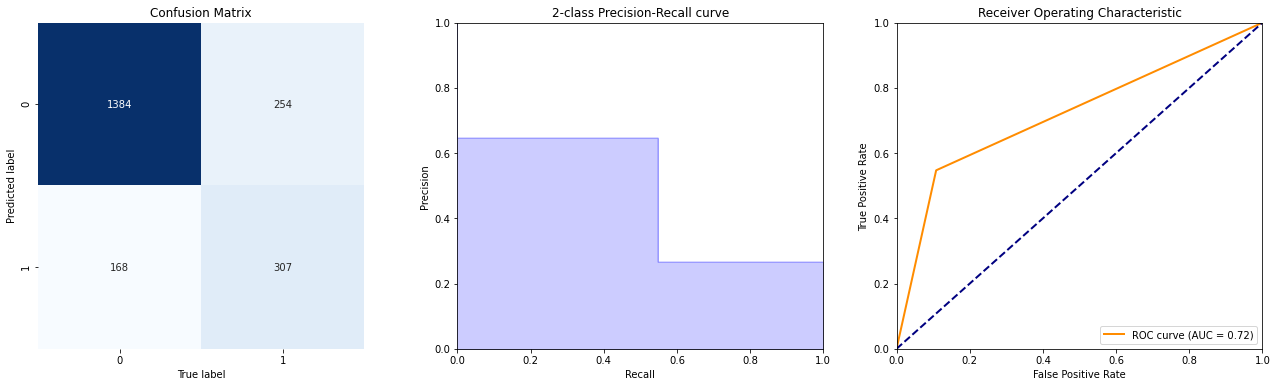


***********************
* K Nearest Neighbour *
***********************
Accuracy : 0.7932 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5834 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6270 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5455 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7141                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


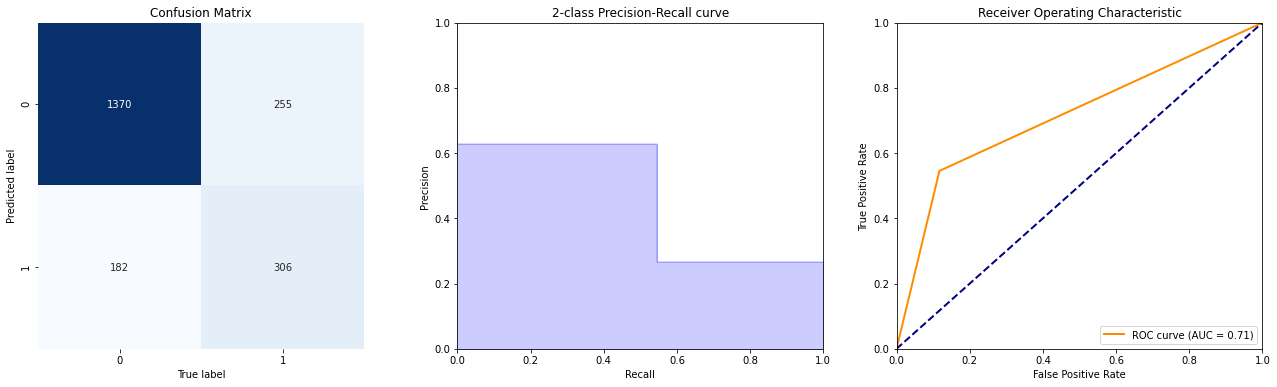


*****************
* Random Forest *
*****************
Accuracy : 0.8154 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.6053 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.7002 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5330 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7253                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


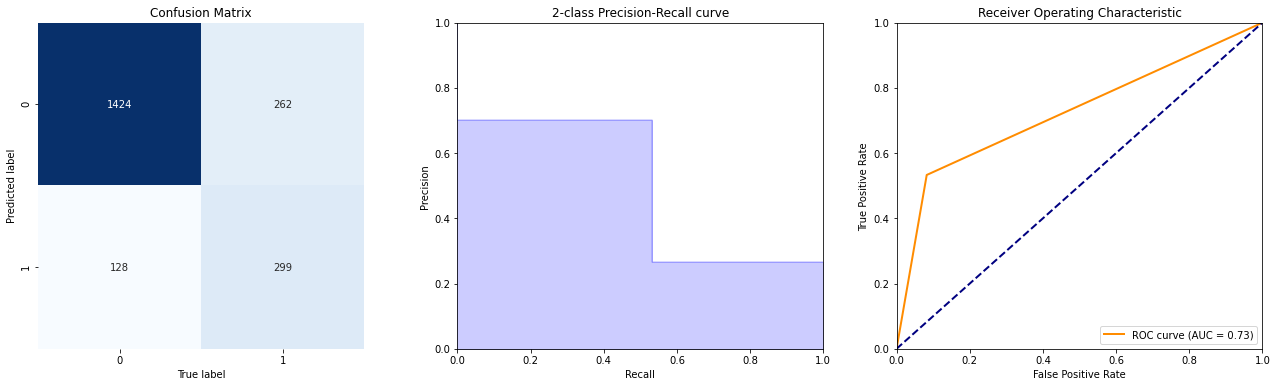


*****************
* Decision Tree *
*****************
Accuracy : 0.7345 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.0000 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


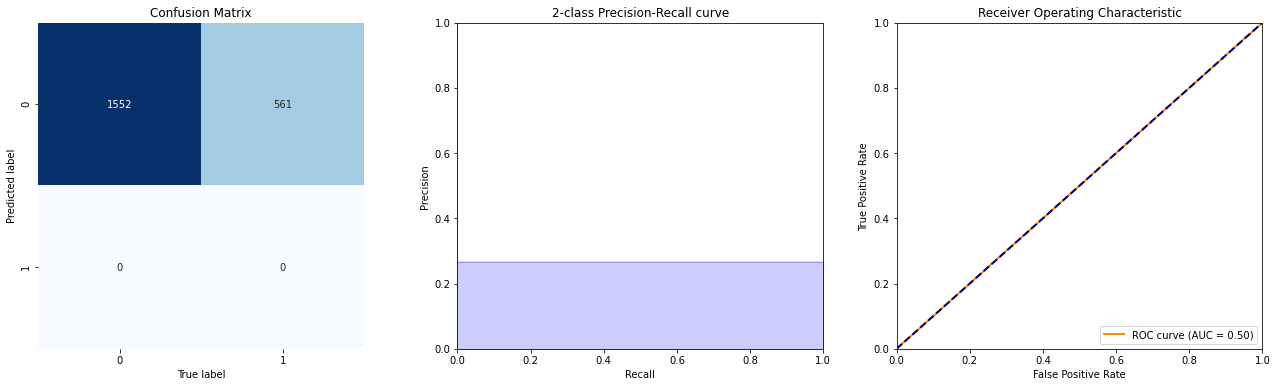


************
* AdaBoost *
************
Accuracy : 0.8135 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
F1 Score : 0.5980 [2 * (Precision * Recall) / (Precision + Recall)].                  Best: 1, Worst: 0
Precision: 0.6993 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5223 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7205                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


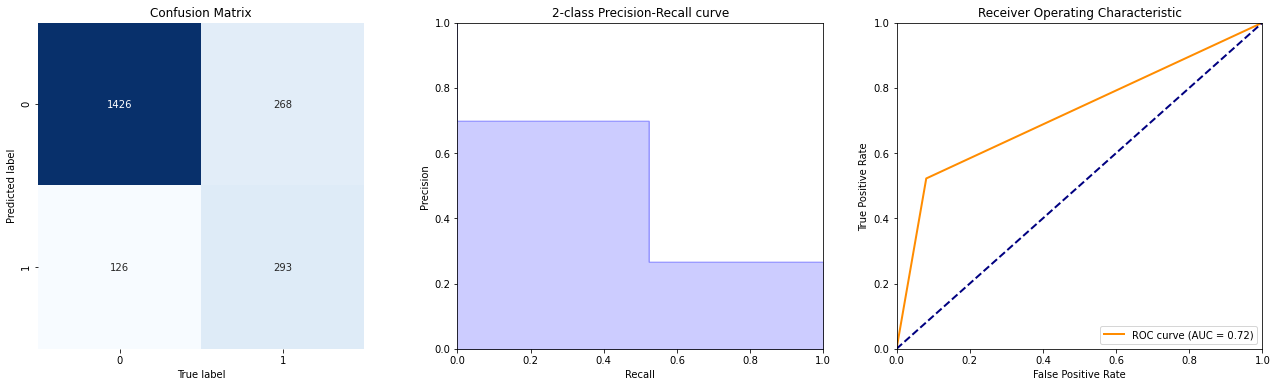

In [81]:
# Evaluate all models

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Logistic Regression','Support Vector Machine','K Nearest Neighbour','Random Forest', 'Decision Tree', 'AdaBoost']
for i, m in enumerate([logr_tuned_gs, svm_tuned_gs, knn_gs, rf_rg, dtc, Ada]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_test)
    # show the report
    accuracy_, precision_, f1_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'F1': round(f1_,4),
                      'Accuracy': round(accuracy_,4), 
                      'Precision': round(precision_,4),
                      'Recall': round(recall_,4),
                      'ROC_AUC': round(roc_auc_,4)}
    print()
    


In [82]:
# Summary all results is pandaframe 

results

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,Logistic Regression,0.8083,0.6806,0.5921,0.5241,0.7176
1,Support Vector Machine,0.8003,0.6463,0.5927,0.5472,0.7195
2,K Nearest Neighbour,0.7932,0.6270,0.5834,0.5455,0.7141
3,Random Forest,0.8154,0.7002,0.6053,0.5330,0.7253
4,Decision Tree,0.7345,0.0000,0.0000,0.0000,0.5000
5,AdaBoost,0.8135,0.6993,0.5980,0.5223,0.7205


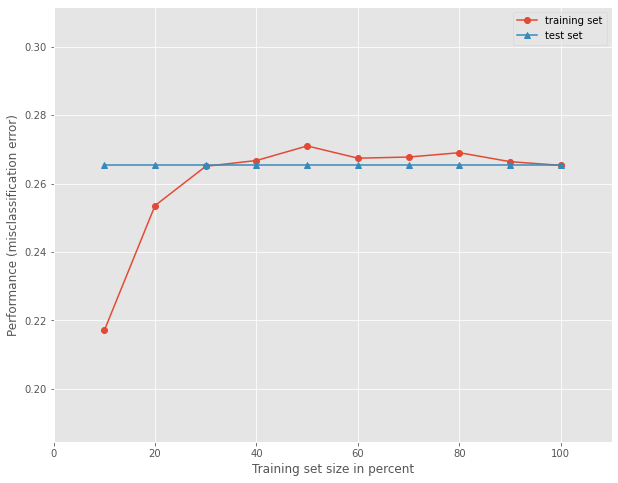

In [83]:
# Evalaute using learning curve

boosting = AdaBoostClassifier(n_estimators = num_trees, learning_rate = 0.01, random_state = seed)
        
plt.figure(figsize=(10, 8))
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model = False, style = 'ggplot')
plt.show()

### Summary

Best Performance Model for testing data : Ada Boosting

## 9) Model Deployment

In [84]:
#Saving best model 

import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(Ada, filename)

['model.sav']

_____END_____